**AIM:** To write a python program to implement Support Vector Machines classifier to classify a Pulsar star from kaggle dataset.

**IMPLEMENTATION:**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns  
warnings.filterwarnings("ignore")

In [2]:
DataFrame = pd.read_csv("pulsar_stars.csv")  
DataFrame.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
labels = DataFrame.target_class.values
DataFrame.drop(["target_class"],axis=1,inplace=True)
features = DataFrame.values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.2)

In [8]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)
svm_model.fit(x_train,y_train)
y_head_svm = svm_model.predict(x_test)
svm_score = svm_model.score(x_test,y_test)

Accuracy is: 0.9807262569832402


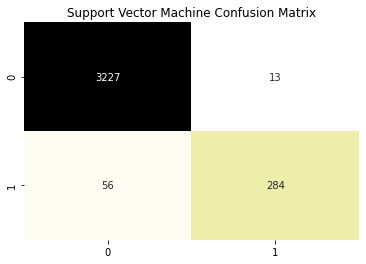

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is:", accuracy_score(y_head_svm, y_test))
cm_svm = confusion_matrix(y_test,y_head_svm)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")